In [1]:
import os
os.environ["HF_HOME"] = "/DATA2/HuggingFace"
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

import torch
from transformers import LlavaNextProcessor, LlavaNextForConditionalGeneration
from deephallu.data.mme import MMEDataset


processor = LlavaNextProcessor.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf")
model = LlavaNextForConditionalGeneration.from_pretrained("llava-hf/llava-v1.6-mistral-7b-hf", torch_dtype=torch.float16, low_cpu_mem_usage=True).to("cuda:0")

image_processor = processor.image_processor
vision_tower = model.vision_tower
tokenizer = processor.tokenizer

dataset = MMEDataset()
image, id, image_name, category, question, answer = dataset[0]
conversation = [
    {

    "role": "user",
    "content": [
        {"type": "text", "text": question},
        {"type": "image"},
        ],
    },
]

prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)
inputs = processor(images=image, text=prompt, return_tensors="pt").to("cuda:0")

outputs = model.generate(**inputs, max_new_tokens=1000)
print(tokenizer.decode(outputs[0], skip_special_tokens=False))

/home/mou/anaconda3/envs/deephallu/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 2 files: 100%|██████████| 2/2 [00:00<00:00, 16810.84it/s]
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
`torch_dtype` is deprecated! Use `dtype` instead!
Loading checkpoint shards: 100%|██████████| 4/4 [00:00<00:00, 32.53it/s]
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


<s> [INST] <image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><image><i

In [2]:
for k, v in inputs.items():
    print(k, v.shape)

input_ids torch.Size([1, 2369])
attention_mask torch.Size([1, 2369])
pixel_values torch.Size([1, 5, 3, 336, 336])
image_sizes torch.Size([1, 2])


In [3]:
# image_processor的参数：
for k, v in processor.__dict__.items():
    print(f'{k} = {v}')

patch_size = 14
num_additional_image_tokens = 1
vision_feature_select_strategy = default
image_token = <image>
image_token_id = 32000
chat_template = {% for message in messages %}{% if message['role'] == 'system' %}{{ '<<SYS>>
' + message['content'][0]['text'] + '
<</SYS>>

' }}{% elif message['role'] == 'user' %}{{ '[INST] ' }}{# Render all images first #}{% for content in message['content'] | selectattr('type', 'equalto', 'image') %}{{ '<image>
' }}{% endfor %}{# Render all text next #}{% for content in message['content'] | selectattr('type', 'equalto', 'text') %}{{ content['text'] }}{% endfor %}{{' [/INST]' }}{% elif message['role'] == 'assistant' %}{{ ' ' + message['content'][0]['text'] + '</s> '}}{% else %}{{ raise_exception('Only user and assistant roles are supported!') }}{% endif %}{% endfor %}
audio_tokenizer = None
image_processor = LlavaNextImageProcessor {
  "aspect_ratio_setting": "anyres",
  "crop_size": {
    "height": 336,
    "width": 336
  },
  "do_center_crop": true,

In [4]:
for k, v in image_processor.__dict__.items():
    print(f'{k} = {v}')

_processor_class = LlavaNextProcessor
aspect_ratio_setting = anyres
image_processor_type = LlavaNextImageProcessor
do_resize = True
size = {'shortest_edge': 336}
image_grid_pinpoints = [[336, 672], [672, 336], [672, 672], [1008, 336], [336, 1008]]
resample = 3
do_center_crop = True
crop_size = {'height': 336, 'width': 336}
do_rescale = True
rescale_factor = 0.00392156862745098
do_normalize = True
image_mean = [0.48145466, 0.4578275, 0.40821073]
image_std = [0.26862954, 0.26130258, 0.27577711]
do_pad = True
do_convert_rgb = True


In [5]:
print(f"do_rescale: {image_processor.do_rescale}")
print(f"rescale_factor: {image_processor.rescale_factor}")
print(f"do_normalize: {image_processor.do_normalize}")
print(f"image_mean: {image_processor.image_mean}")
print(f"image_std: {image_processor.image_std}")
print(f"do_center_crop: {image_processor.do_center_crop}")
print(f"crop_size: {image_processor.crop_size}")
print(f"do_resize: {image_processor.do_resize}")
print(f"size: {image_processor.size}")
print(f"resample: {image_processor.resample}")
print(f"do_pad: {image_processor.do_pad}")
print(f"do_convert_rgb: {image_processor.do_convert_rgb}")
print(f"image_grid_pinpoints: {image_processor.image_grid_pinpoints}")

do_rescale = image_processor.do_rescale
rescale_factor = image_processor.rescale_factor
do_normalize = image_processor.do_normalize
image_mean = image_processor.image_mean
image_std = image_processor.image_std   
do_center_crop = image_processor.do_center_crop
crop_size = image_processor.crop_size
do_resize = image_processor.do_resize
size = image_processor.size
resample = image_processor.resample
do_pad = image_processor.do_pad
do_convert_rgb = image_processor.do_convert_rgb
image_grid_pinpoints = image_processor.image_grid_pinpoints


do_rescale: True
rescale_factor: 0.00392156862745098
do_normalize: True
image_mean: [0.48145466, 0.4578275, 0.40821073]
image_std: [0.26862954, 0.26130258, 0.27577711]
do_center_crop: True
crop_size: {'height': 336, 'width': 336}
do_resize: True
size: {'shortest_edge': 336}
resample: 3
do_pad: True
do_convert_rgb: True
image_grid_pinpoints: [[336, 672], [672, 336], [672, 672], [1008, 336], [336, 1008]]


In [6]:
image_inputs = processor.image_processor(image)
for k, v in image_inputs.items():
    print(k)

print(image_inputs['pixel_values'][0].shape)
print(image_inputs['image_sizes'])

pixel_values
image_sizes
(5, 3, 336, 336)
[(808, 1100)]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.864775].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.8865409].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.9548216].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.9698293].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.9848372].


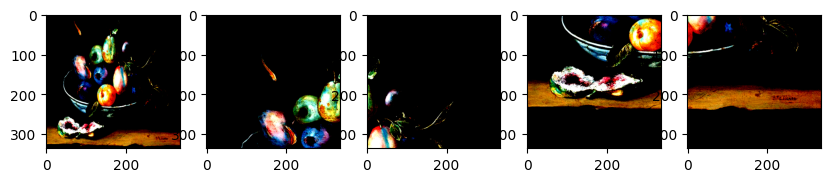

In [10]:
plt.figure(figsize=(10, 10))
plt.subplot(1, len(image_inputs['pixel_values'][0]), 1)
plt.imshow(np.transpose(image_inputs['pixel_values'][0][0], (1, 2, 0)))
plt.subplot(1, len(image_inputs['pixel_values'][0]), 2)
plt.imshow(np.transpose(image_inputs['pixel_values'][0][1], (1, 2, 0)))
plt.subplot(1, len(image_inputs['pixel_values'][0]), 3)
plt.imshow(np.transpose(image_inputs['pixel_values'][0][2], (1, 2, 0)))
plt.subplot(1, len(image_inputs['pixel_values'][0]), 4)
plt.imshow(np.transpose(image_inputs['pixel_values'][0][3], (1, 2, 0)))
plt.subplot(1, len(image_inputs['pixel_values'][0]), 5)
plt.imshow(np.transpose(image_inputs['pixel_values'][0][4], (1, 2, 0)))
plt.show()

#### Best resolution

`select_best_resolution`函数定义在`transformers/src/transformers/image_processing_utils.py`中。

In [ ]:
def select_best_resolution(original_size: tuple, possible_resolutions: list) -> tuple:
    original_height, original_width = original_size
    best_fit = None
    max_effective_resolution = 0
    min_wasted_resolution = float("inf")
    for height, width in possible_resolutions:
        print(f'====================== grid pinpoint ({height}, {width}) =========================')
        print(f'original_size: {original_size}, size: ({height}, {width})')
        print(f'width scale: {width / original_width}, height scale: {height / original_height}')
        scale = min(width / original_width, height / original_height)
        print(f'scale: {scale}')
        downscaled_width, downscaled_height = int(original_width * scale), int(original_height * scale)
        print(f'downscaled_width: {downscaled_width}, downscaled_height: {downscaled_height}')
        effective_resolution = min(downscaled_width * downscaled_height, original_width * original_height)
        print(f'downscaled_resolution: {downscaled_width * downscaled_height}, original_resolution: {original_width * original_height}')
        print(f'effective_resolution: {effective_resolution}')
        wasted_resolution = (width * height) - effective_resolution
        print(f'wasted_resolution: {wasted_resolution}')
        if effective_resolution > max_effective_resolution or (
            effective_resolution == max_effective_resolution and wasted_resolution < min_wasted_resolution
        ):
            print(f'\n\t update best_fit: {height}, {width}')
            max_effective_resolution = effective_resolution
            min_wasted_resolution = wasted_resolution
            best_fit = (height, width)
        print('\n')
    return best_fit

image_size = (808, 1100)
image_grid_pinpoints = [[336, 672], [672, 336], [672, 672], [1008, 336], [336, 1008]]
best_resolution = select_best_resolution(image_size, image_grid_pinpoints)
print(f'best_resolution: {best_resolution}')

====================== grid pinpoint (336, 672) =========================
original_size: (808, 1100), size: (336, 672)
width scale: 0.610909090909091, height scale: 0.4158415841584158
scale: 0.4158415841584158
downscaled_width: 457, downscaled_height: 336
downscaled_resolution: 153552, original_resolution: 888800
effective_resolution: 153552
wasted_resolution: 72240

	 update best_fit: 336, 672


====================== grid pinpoint (672, 336) =========================
original_size: (808, 1100), size: (672, 336)
width scale: 0.3054545454545455, height scale: 0.8316831683168316
scale: 0.3054545454545455
downscaled_width: 336, downscaled_height: 246
downscaled_resolution: 82656, original_resolution: 888800
effective_resolution: 82656
wasted_resolution: 143136


====================== grid pinpoint (672, 672) =========================
original_size: (808, 1100), size: (672, 672)
width scale: 0.610909090909091, height scale: 0.8316831683168316
scale: 0.610909090909091
downscaled_width: 67

In [ ]:
def get_unpadded_features(height, width, patches_height, patches_width, scale_height, scale_width):
    """
    Get number of features for a given image with height/width. LLaVA-NeXT is different from LLaVA
    because it divided each image into patches depending on its resolution. Therefore we need to calculate how many
    patches an image is divided into and get the number of features from that.
    """
    print(f'height: {height}, width: {width}, patches_height: {patches_height}, patches_width: {patches_width}, scale_height: {scale_height}, scale_width: {scale_width}')
    current_height = patches_height * scale_height
    current_width = patches_width * scale_width
    print(f'current_height: {current_height}, current_width: {current_width}')
    original_aspect_ratio = width / height
    current_aspect_ratio = current_width / current_height
    print(f'original_aspect_ratio: {original_aspect_ratio}, current_aspect_ratio: {current_aspect_ratio}')
    if original_aspect_ratio > current_aspect_ratio:
        new_height = int(round(height * (current_width / width), 7))
        print(f'new_height: {new_height}')
        padding = (current_height - new_height) // 2
        print(f'padding: {padding}')
        current_height -= padding * 2
        print(f'current_height: {current_height}')
    else:
        new_width = int(round(width * (current_height / height), 7))
        print(f'new_width: {new_width}')
        padding = (current_width - new_width) // 2
        print(f'padding: {padding}')
        current_width -= padding * 2
        print(f'current_width: {current_width}')
    unpadded_features = current_height * current_width
    newline_features = current_height
    print(f'unpadded_features: {unpadded_features}, newline_features: {newline_features}')
    return (unpadded_features, newline_features)

orig_height, orig_width = 808, 1100
height_best_resolution, width_best_resolution = 672, 672
height, width = 336, 336
scale_height, scale_width = height_best_resolution // height, width_best_resolution // width
patch_size = 14
patches_height = height // patch_size
patches_width = width // patch_size
# unpadded_features, newline_features = get_unpadded_features(orig_height, orig_width, patches_height, patches_width, scale_height, scale_width)

unpadded_features, newline_features = get_unpadded_features(880, 1100, 6, 6, 1, 1)
print(f'unpadded_features + newline_features + base_features: {unpadded_features  + newline_features + patches_height * patches_width}')

height: 880, width: 1100, patches_height: 6, patches_width: 6, scale_height: 1, scale_width: 1
current_height: 6, current_width: 6
original_aspect_ratio: 1.25, current_aspect_ratio: 1.0
new_height: 4
padding: 1
current_height: 4
unpadded_features: 24, newline_features: 4
unpadded_features + newline_features + base_features: 604


## Processor

Get image patches...

In [ ]:
from transformers.image_utils import get_image_size, infer_channel_dimension_format, to_numpy_array
from transformers.image_processing_utils_fast import convert_to_rgb
from transformers.image_processing_utils import select_best_resolution
from transformers.image_transforms import to_channel_dimension_format, resize
from transformers.models.llava_next.image_processing_llava_next import divide_to_patches

rgb_image = convert_to_rgb(image)
np_image = to_numpy_array(rgb_image)

input_data_format = infer_channel_dimension_format(np_image)
print(f'input_data_format: {input_data_format}')
data_format = input_data_format

possible_resolutions = image_grid_pinpoints
image_size = get_image_size(np_image, channel_dim=input_data_format) 
print(f'image_size: {image_size}')

best_resolution = select_best_resolution(image_size, possible_resolutions)
print(f'best_resolution: {best_resolution}')

resized_image = image_processor._resize_for_patching(np_image, best_resolution, resample=resample, input_data_format=input_data_format)
print(f'resized_image.shape: {resized_image.shape}')
print(resized_image.shape[0] / np_image.shape[0])
print(resized_image.shape[1] / np_image.shape[1])

padded_image = image_processor._pad_for_patching(resized_image, best_resolution, input_data_format=input_data_format)
print(f'padded_image.shape: {padded_image.shape}')

patch_size = crop_size["height"]
patches = divide_to_patches(padded_image, patch_size, input_data_format)
print(f'patches[0].shape: {patches[0].shape}')

patches = [to_channel_dimension_format(patch, channel_dim=data_format, input_channel_dim=input_data_format) for patch in patches]

resized_original_image = resize(image, size=(size["shortest_edge"], size["shortest_edge"]), resample=resample, data_format=data_format, input_data_format=input_data_format)
print(f'resized_original_image.shape: {resized_original_image.shape}')
image_patches = [resized_original_image] + patches

input_data_format: ChannelDimension.LAST
image_size: (808, 1100)
best_resolution: (672, 672)
resized_image.shape: (494, 672, 3)
0.6113861386138614
0.610909090909091
padded_image.shape: (672, 672, 3)
patches[0].shape: (336, 336, 3)
resized_original_image.shape: (336, 336, 3)


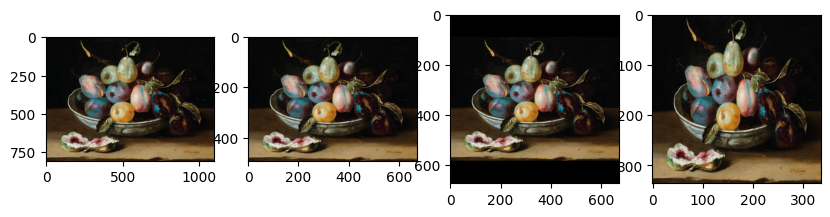

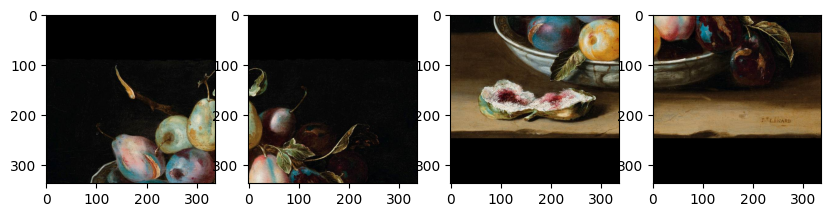

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(np_image)
plt.subplot(1, 4, 2)
plt.imshow(resized_image)
plt.subplot(1, 4, 3)
plt.imshow(padded_image)
plt.subplot(1, 4, 4)
plt.imshow(resized_original_image)
plt.show()

plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(patches[0])
plt.subplot(1, 4, 2)
plt.imshow(patches[1])
plt.subplot(1, 4, 3)
plt.imshow(patches[2])
plt.subplot(1, 4, 4)
plt.imshow(patches[3])
plt.show()

In [ ]:
do_resize=image_processor.do_resize
size=image_processor.size
resample=image_processor.resample
do_center_crop=image_processor.do_center_crop
crop_size=image_processor.crop_size
do_rescale=image_processor.do_rescale
rescale_factor=image_processor.rescale_factor
do_normalize=image_processor.do_normalize
image_mean=image_processor.image_mean
image_std=image_processor.image_std

data_format=input_data_format
input_data_format=input_data_format

print(f"do_resize: {do_resize}")
print(f"size: {size}")
print(f"resample: {resample}")
print(f"do_center_crop: {do_center_crop}")
print(f"crop_size: {crop_size}")
print(f"do_rescale: {do_rescale}")
print(f"rescale_factor: {rescale_factor}")
print(f"do_normalize: {do_normalize}")
print(f"image_mean: {image_mean}")
print(f"image_std: {image_std}")
print(f"data_format: {data_format}")
print(f"input_data_format: {input_data_format}")

do_resize: True
size: {'shortest_edge': 336}
resample: 3
do_center_crop: True
crop_size: {'height': 336, 'width': 336}
do_rescale: True
rescale_factor: 0.00392156862745098
do_normalize: True
image_mean: [0.48145466, 0.4578275, 0.40821073]
image_std: [0.26862954, 0.26130258, 0.27577711]
data_format: ChannelDimension.LAST
input_data_format: ChannelDimension.LAST


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.864775].


len(images): 5
image: =================================================================================
before do_resize: True,
	 size: {'shortest_edge': 336},
	 resample: 3,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_resize image: (336, 336, 3)
before do_center_crop: True,
	 size: {'height': 336, 'width': 336},
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_center_crop image: (336, 336, 3)
before do_rescale: True,
	 scale: 0.00392156862745098,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_rescale image: (336, 336, 3)
before do_normalize: True,
	 mean: [0.48145466, 0.4578275, 0.40821073],
	 std: [0.26862954, 0.26130258, 0.27577711],
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_normalize image: (336, 336, 3)


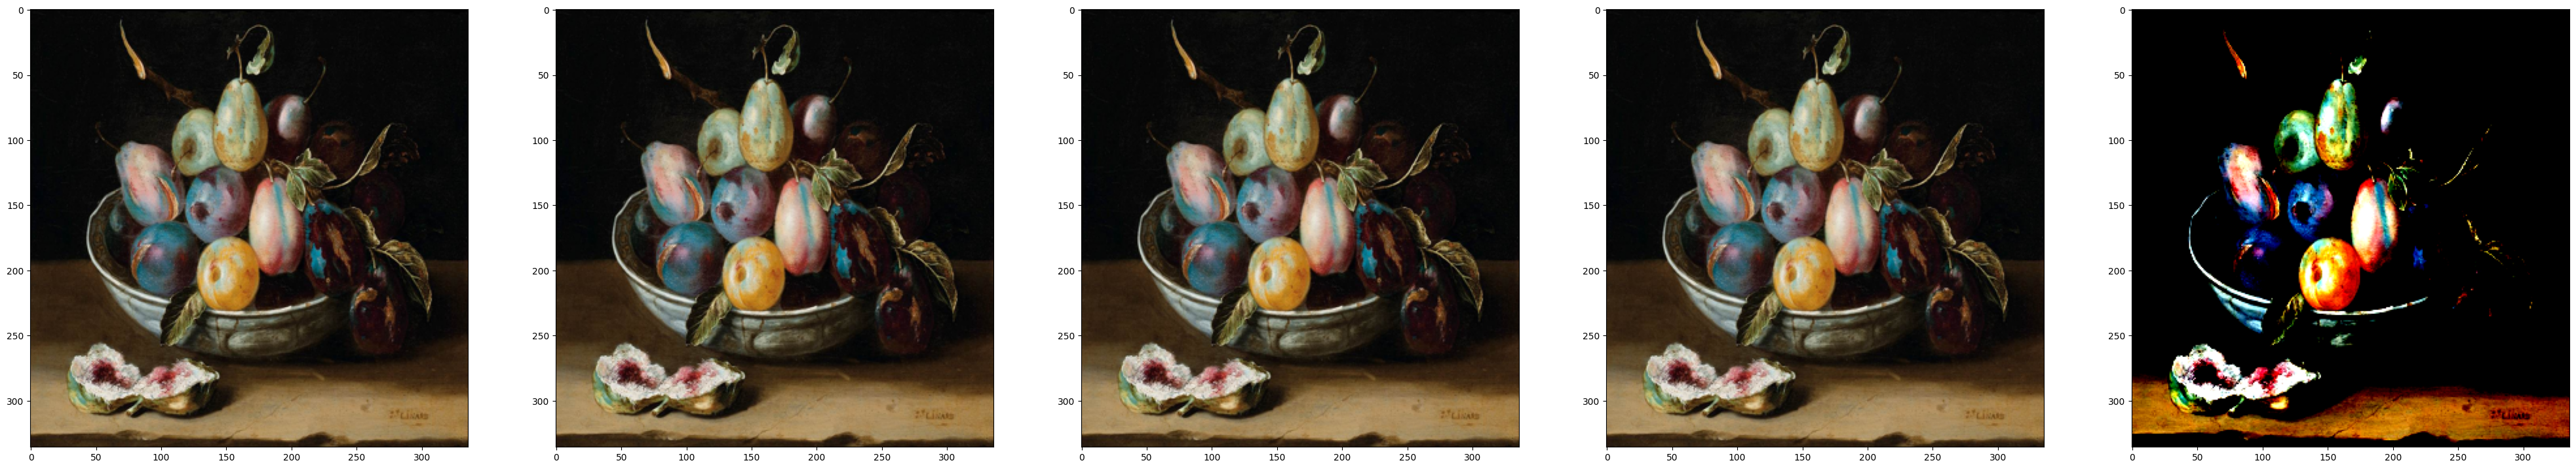

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.8865409].


image: =================================================================================
before do_resize: True,
	 size: {'shortest_edge': 336},
	 resample: 3,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_resize image: (336, 336, 3)
before do_center_crop: True,
	 size: {'height': 336, 'width': 336},
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_center_crop image: (336, 336, 3)
before do_rescale: True,
	 scale: 0.00392156862745098,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_rescale image: (336, 336, 3)
before do_normalize: True,
	 mean: [0.48145466, 0.4578275, 0.40821073],
	 std: [0.26862954, 0.26130258, 0.27577711],
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_normalize image: (336, 336, 3)


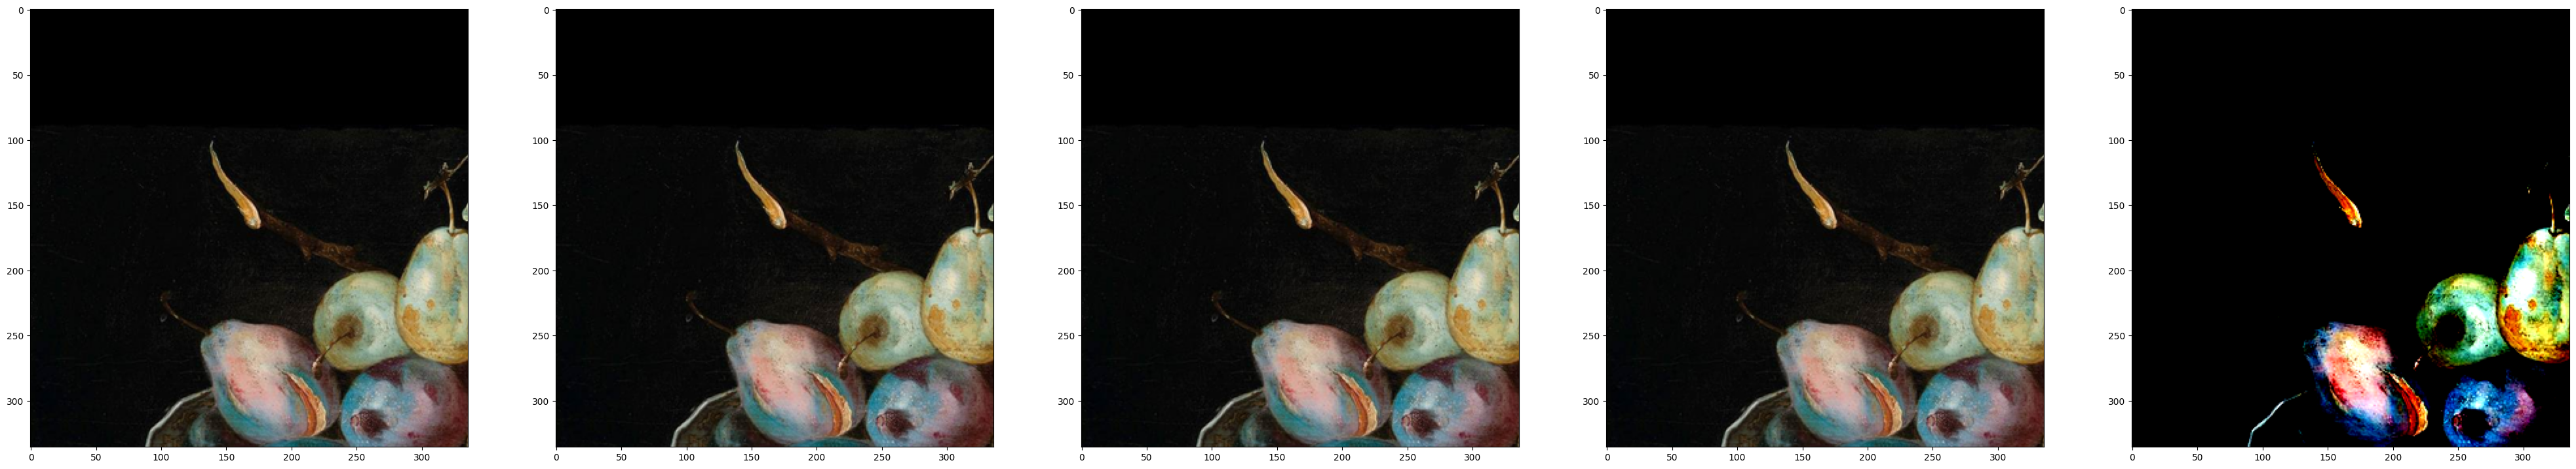

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.9548216].


image: =================================================================================
before do_resize: True,
	 size: {'shortest_edge': 336},
	 resample: 3,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_resize image: (336, 336, 3)
before do_center_crop: True,
	 size: {'height': 336, 'width': 336},
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_center_crop image: (336, 336, 3)
before do_rescale: True,
	 scale: 0.00392156862745098,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_rescale image: (336, 336, 3)
before do_normalize: True,
	 mean: [0.48145466, 0.4578275, 0.40821073],
	 std: [0.26862954, 0.26130258, 0.27577711],
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_normalize image: (336, 336, 3)


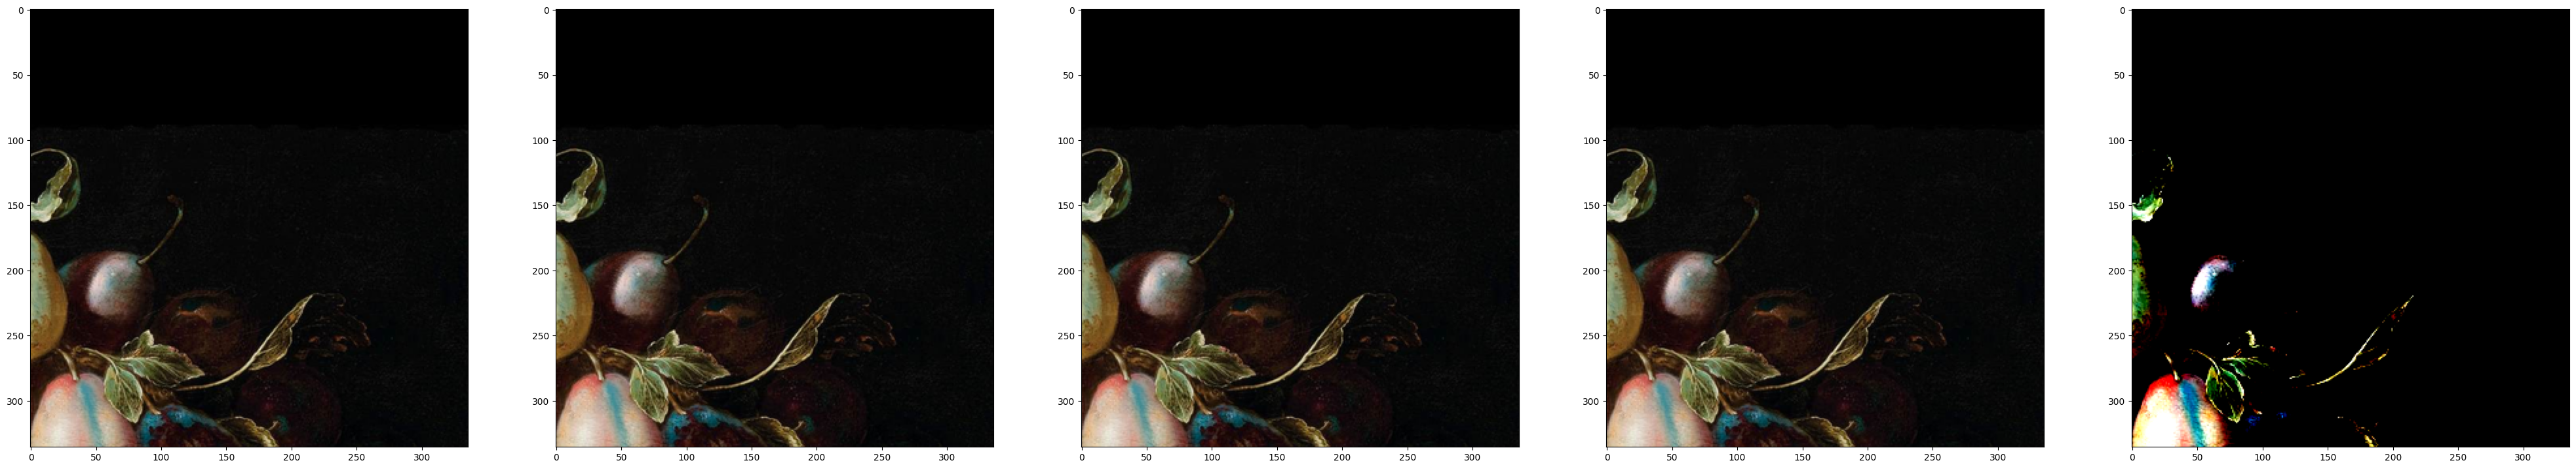

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.9698293].


image: =================================================================================
before do_resize: True,
	 size: {'shortest_edge': 336},
	 resample: 3,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_resize image: (336, 336, 3)
before do_center_crop: True,
	 size: {'height': 336, 'width': 336},
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_center_crop image: (336, 336, 3)
before do_rescale: True,
	 scale: 0.00392156862745098,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_rescale image: (336, 336, 3)
before do_normalize: True,
	 mean: [0.48145466, 0.4578275, 0.40821073],
	 std: [0.26862954, 0.26130258, 0.27577711],
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_normalize image: (336, 336, 3)


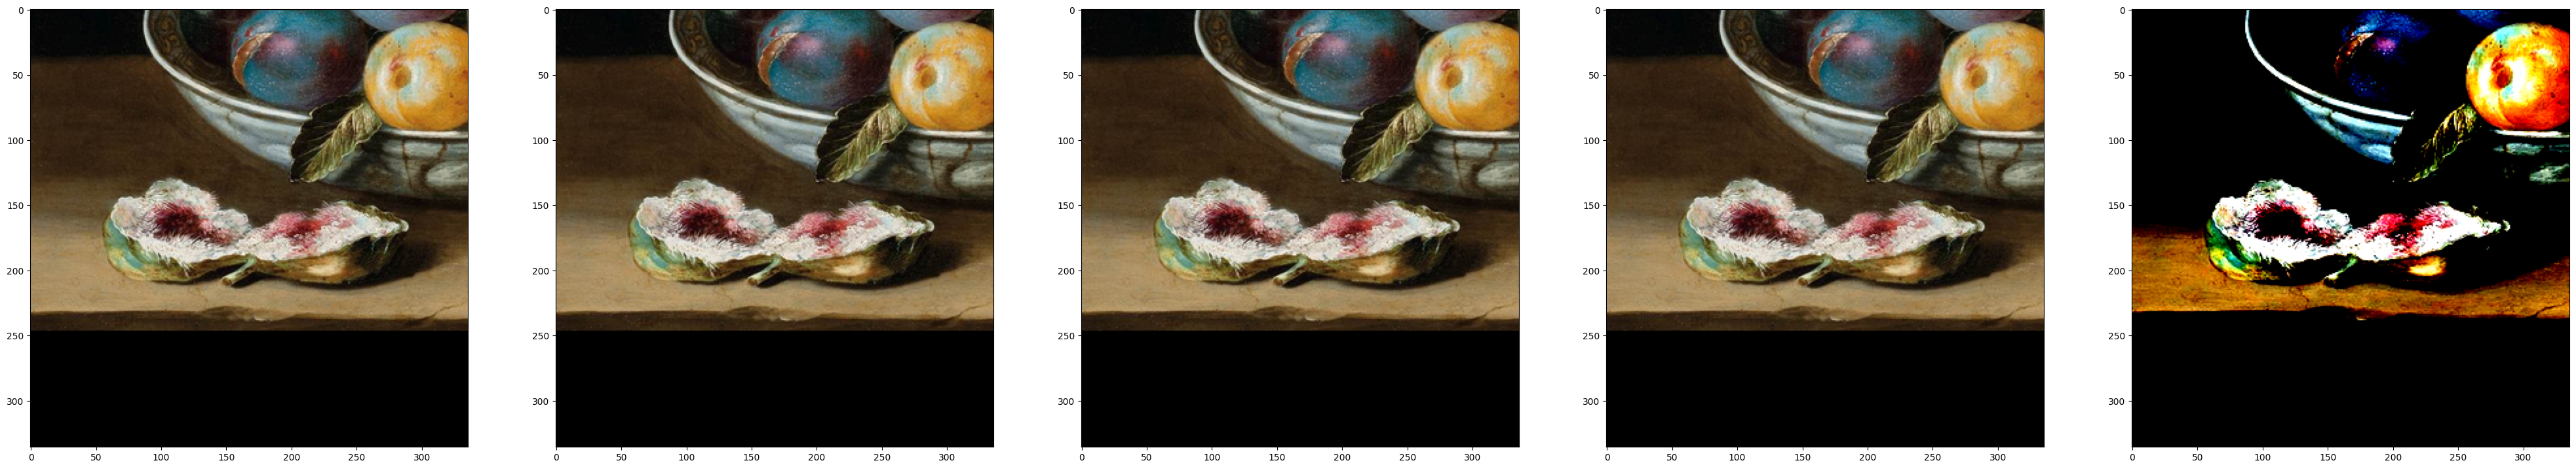

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7922626..1.9848372].


image: =================================================================================
before do_resize: True,
	 size: {'shortest_edge': 336},
	 resample: 3,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_resize image: (336, 336, 3)
before do_center_crop: True,
	 size: {'height': 336, 'width': 336},
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_center_crop image: (336, 336, 3)
before do_rescale: True,
	 scale: 0.00392156862745098,
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_rescale image: (336, 336, 3)
before do_normalize: True,
	 mean: [0.48145466, 0.4578275, 0.40821073],
	 std: [0.26862954, 0.26130258, 0.27577711],
	 input_data_format: ChannelDimension.LAST,
	 image: (336, 336, 3)
after do_normalize image: (336, 336, 3)


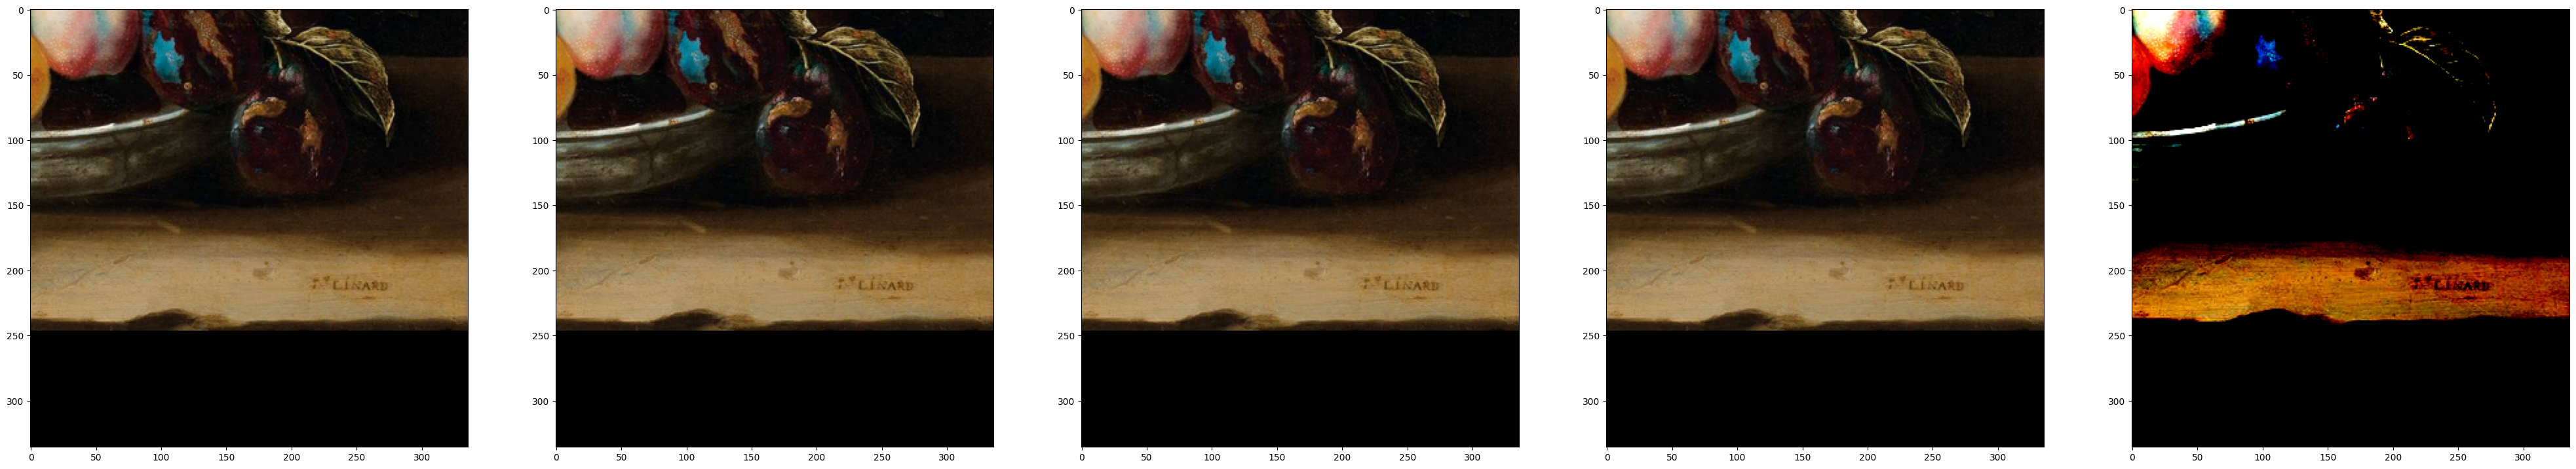

In [ ]:
from transformers.image_utils import make_list_of_images
images = make_list_of_images(image_patches)
print(f"len(images): {len(images)}")
all_images = []
for image in images:
    plt.figure(figsize=(50, 10))
    plt.subplot(1, 5, 1)
    plt.imshow(image)
    print(f"image: =================================================================================")
    if do_resize:
        print(f"before do_resize: {do_resize},\n\t size: {size},\n\t resample: {resample},\n\t input_data_format: {input_data_format},\n\t image: {image.shape}")
        image = image_processor.resize(image=image, size=size, resample=resample, input_data_format=input_data_format)
        print(f"after do_resize image: {image.shape}")
        plt.subplot(1, 5, 2)
        plt.imshow(image)
    if do_center_crop:
        print(f"before do_center_crop: {do_center_crop},\n\t size: {crop_size},\n\t input_data_format: {input_data_format},\n\t image: {image.shape}")
        image = image_processor.center_crop(image=image, size=crop_size, input_data_format=input_data_format)
        print(f"after do_center_crop image: {image.shape}")
        plt.subplot(1, 5, 3)
        plt.imshow(image)
    if do_rescale:
        print(f"before do_rescale: {do_rescale},\n\t scale: {rescale_factor},\n\t input_data_format: {input_data_format},\n\t image: {image.shape}")
        image = image_processor.rescale(image=image, scale=rescale_factor, input_data_format=input_data_format)
        print(f"after do_rescale image: {image.shape}")
        plt.subplot(1, 5, 4)
        plt.imshow(image)
    if do_normalize:
        print(f"before do_normalize: {do_normalize},\n\t mean: {image_mean},\n\t std: {image_std},\n\t input_data_format: {input_data_format},\n\t image: {image.shape}")
        image = image_processor.normalize(
            image=image, mean=image_mean, std=image_std, input_data_format=input_data_format
        )
        print(f"after do_normalize image: {image.shape}")
        plt.subplot(1, 5, 5)
        plt.imshow(image)
    plt.show()
    all_images.append(image)
images = [
    to_channel_dimension_format(image, data_format, input_channel_dim=input_data_format)
    for image in all_images
]

In [ ]:
with torch.inference_mode():
    output = model.generate(**inputs, max_new_tokens=100)
print(processor.decode(output[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


[INST]  
Is this artwork created by linard, jacques? Please answer yes or no. [/INST] No, the artwork is not created by Jacques-Louis David. The painting you've shown is "Still Life with Fruit" by Willem Kalf, a Dutch still life painter. 


In [ ]:
vision_feature_select_strategy =  model.config.vision_feature_select_strategy
vision_feature_layer = model.config.vision_feature_layer
output_attentions = model.config.output_attentions
output_hidden_states = model.config.output_hidden_states
use_return_dict = model.config.use_return_dict

pixel_values = inputs['pixel_values']
input_ids = inputs['input_ids']
attention_mask = inputs['attention_mask']
image_sizes = inputs['image_sizes']


print(f'vision_feature_select_strategy: {vision_feature_select_strategy}')
print(f'vision_feature_layer: {vision_feature_layer}')
print(f'output_attentions: {output_attentions}')
print(f'output_hidden_states: {output_hidden_states}')
print(f'use_return_dict: {use_return_dict}')

vision_feature_select_strategy: default
vision_feature_layer: -2
output_attentions: False
output_hidden_states: False
use_return_dict: True


In [ ]:
image_grid_pinpoints = model.config.image_grid_pinpoints
print(f'image_grid_pinpoints: {image_grid_pinpoints}')
patch_size = model.config.vision_config.image_size
print(f'patch_size: {patch_size}')

from transformers.models.llava_next.modeling_llava_next import image_size_to_num_patches
image_num_patches = [image_size_to_num_patches(image_size=imsize, grid_pinpoints=image_grid_pinpoints, patch_size=patch_size) for imsize in image_sizes]
print(f'image_num_patches: {image_num_patches}')

if pixel_values.dim() == 5:
    # stacked if input is (batch_size, num_patches, num_channels, height, width)
    _pixel_values_list = [pix_val[:num_patch] for pix_val, num_patch in zip(pixel_values, image_num_patches)]
    pixel_values = torch.cat(_pixel_values_list, dim=0)
elif pixel_values.dim() != 4:
    # otherwise has to be stacked from list of (num_patches, num_channels, height, width)
    raise ValueError(f"pixel_values of shape {pixel_values.shape}, expect to be of 4 or 5 dimensions")

image_features = vision_tower(pixel_values, output_hidden_states=True)

# BaseModelOutputWithPooling的参数列表
for k, v in image_features.items():
    print(k)

if isinstance(vision_feature_layer, int):
    print(f'vision_feature_layer: {vision_feature_layer}')
    selected_image_feature = image_features.hidden_states[vision_feature_layer]
else:
    hs_pool = [image_features.hidden_states[layer_idx] for layer_idx in vision_feature_layer]
    selected_image_feature = torch.cat(hs_pool, dim=-1)
if vision_feature_select_strategy == "default":
    selected_image_feature = selected_image_feature[:, 1:]
elif vision_feature_select_strategy == "full":
    selected_image_feature = selected_image_feature
print(selected_image_feature.shape)

image_features = model.model.multi_modal_projector(selected_image_feature)
print(image_features.shape)

image_features = torch.split(image_features, image_num_patches, dim=0)
for i, image_feature in enumerate(image_features):
    print(f'image_feature {i}: {image_feature.shape}')

image_newline = model.model.image_newline
print(image_newline.shape)

# image_features, feature_lens = model.model.pack_image_features(
#     image_features,
#     image_sizes,
#     vision_feature_select_strategy=vision_feature_select_strategy,
#     image_newline=image_newline,
# )

# print(feature_lens)
# for i, image_feature in enumerate(image_features):
#     print(f'image_feature {i}: {image_feature.shape}')


image_grid_pinpoints: [[336, 672], [672, 336], [672, 672], [1008, 336], [336, 1008]]
patch_size: 336
image_num_patches: [5]
last_hidden_state
pooler_output
hidden_states
vision_feature_layer: -2
torch.Size([5, 576, 1024])
torch.Size([5, 576, 4096])
image_feature 0: torch.Size([5, 576, 4096])
torch.Size([4096])


In [ ]:
from transformers.models.llava_next.modeling_llava_next import get_anyres_image_grid_shape, unpad_image

print(model.model.config.vision_config.image_size)
print(model.model.config.vision_config.patch_size)
height = width = model.model.config.vision_config.image_size // model.model.config.vision_config.patch_size
print(height, width)

image_grid_pinpoints = model.model.config.image_grid_pinpoints
patch_size = model.model.config.vision_config.image_size
print(image_grid_pinpoints, patch_size)

print(get_anyres_image_grid_shape(image_size=image_size, grid_pinpoints=image_grid_pinpoints, patch_size=patch_size))

num_patch_height, num_patch_width = get_anyres_image_grid_shape(
    image_sizes[0],
    image_grid_pinpoints,
    patch_size,
)

print(num_patch_height, num_patch_width)

336
14
24 24
[[336, 672], [672, 336], [672, 672], [1008, 336], [336, 1008]] 336
(2, 2)
2 2


In [ ]:
base_image_feature = image_features[0][0]
image_feature = image_features[0][1:]
print(base_image_feature.shape)
print(image_feature.shape)

image_feature = image_feature.view(num_patch_height, num_patch_width, height, width, -1)
image_feature = image_feature.permute(4, 0, 2, 1, 3).contiguous()
print(image_feature.shape)
image_feature = image_feature.flatten(1, 2).flatten(2, 3)
print(image_feature.shape)

image_feature = unpad_image(image_feature, image_sizes[0])
print(image_feature.shape)

image_feature = torch.cat(
        (
            image_feature,
            image_newline[:, None, None]
            .expand(*image_feature.shape[:-1], 1)
            .to(image_feature.device, image_feature.dtype),
        ),
        dim=-1,
    )

print(image_feature.shape)
image_feature = image_feature.flatten(1, 2).transpose(0, 1)
print(image_feature.shape)
image_feature = torch.cat((base_image_feature, image_feature), dim=0)
print(image_feature.shape)

torch.Size([576, 4096])
torch.Size([4, 576, 4096])
torch.Size([4096, 2, 24, 2, 24])
torch.Size([4096, 48, 48])
torch.Size([4096, 36, 48])
torch.Size([4096, 36, 49])
torch.Size([1764, 4096])
torch.Size([2340, 4096])
